In [1]:
"""
Template for week 3 project in Data Visualization

Read, clean, and plot financial time series from stock indices using matplotlib
"""

import csv
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Resource paths
DATA_PATH = "data/"
PLOTS_PATH = "plots/"

# Financial data files
DJIA_34 = DATA_PATH + "DJIA_34.csv"
DJIA = DATA_PATH + "DJIA.csv"
NASDAQ_100 = DATA_PATH + "NASDAQ_100.csv"
NASDAQ = DATA_PATH + "NASDAQ.csv"
SP500 = DATA_PATH + "SP500.csv"


In [3]:
###################################################################
# Part 1 - Read, clean, and plot financial time series data 

def read_series(index_file):
    """
    Input: String index_file for CSV file containing stock index data
    
    Output: Time series as a list of tuples where each tuple is
    a pair of strings corresponding to a row in the CSV file
    """ 
    
    with open(index_file, 'r') as file:
        reader = csv.reader(file)
        return [(row[0], row[1]) for row in reader]

In [4]:
def clean_series(raw_series):
    """
    Input: List raw_series whose entries are tuples (date, price)
    where dates corresponding to holidays have price "."
    
    Output: A list whose entries are tuples consisting of
    a date (string) and a price (float). Entries corresponding
    to the header and holidays have been removed.
    """
    cleaned_series = []
    for date, price in raw_series[1:]:  
        if price != '.':
            cleaned_series.append((date, float(price)))  
    return cleaned_series

In [5]:
def plot_prices(index_file):
    """
    Input: String index_file corresponding to a csv file
    containing financial time series data
    
    Output: matplotlib figure consistin of a line plot 
    of prices from cleaned series
    y-axis should have appropriate label
    """
    raw_series = read_series(index_file)
    cleaned_series = clean_series(raw_series)
    _ext, prices = zip(*cleaned_series)

    fig, axs = plt.subplots()
    axs.plot(prices)
    axs.set_ylabel('Index Price (USD)')

    plt.show()
    return fig

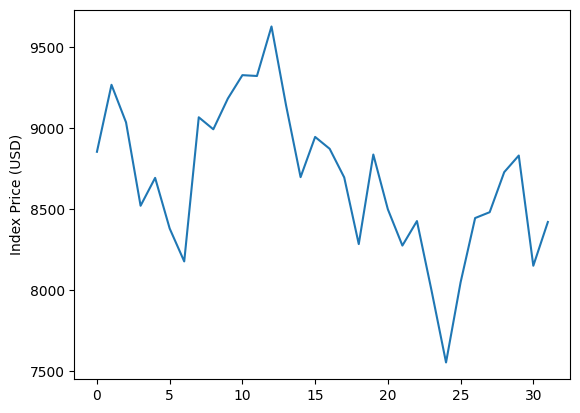

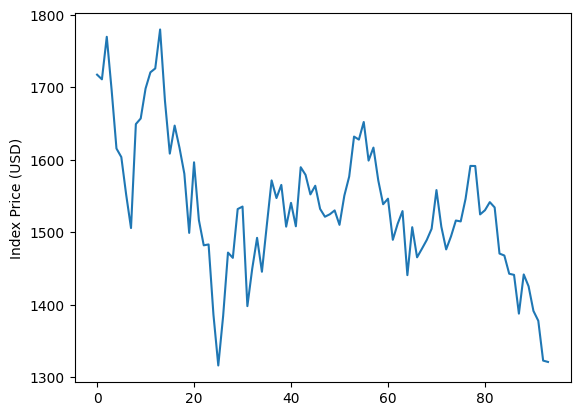

In [6]:
def test_plot_prices():
    """ Test plot_prices """
    
    plot_prices(DJIA_34)
    plot_prices(NASDAQ_100)

test_plot_prices()

In [7]:
###########################################################
# Part 2 - Convert ISO data format to days and make better plots

def isodate_to_day(isodate):
    """
    Input: A string date in ISO date format

    Output: Float corrspending to mumber of days used in
    matplotlib's plt.plot_date()
    """
    date_con = [datetime.datetime.strptime(isodate, "%Y-%m-%d")]
    return mdates.date2num(date_con)

In [8]:
def plot_dates_prices(index_file):
    """
    Input: Strings index_file for CSV file with stock index data
    
    Output: matplotlib figure generated by reading the CSV file
    index_file and plotting the dates/prices using isodate_to_day()
    """
    cleaned_series = clean_series(read_series(index_file))

    _ext, prices = zip(*cleaned_series)
    days = [isodate_to_day(date) for date in _ext]
    index_name = index_file.split('/')[-1].replace('.csv', '')

    fig, axs = plt.subplots()
    axs.plot(days, prices, linestyle='solid', linewidth=2) 

    axs.set_title(f'{index_name} Index Prices')
    axs.set_xlabel('Date')
    axs.set_ylabel('Index Price (USD)')

    axs.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    fig.autofmt_xdate()

    plt.show()
    return fig

        

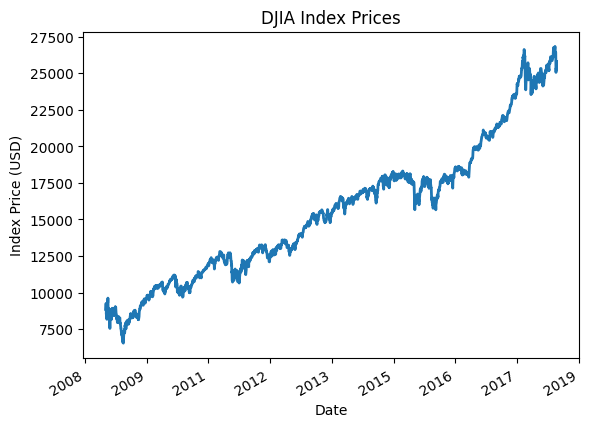

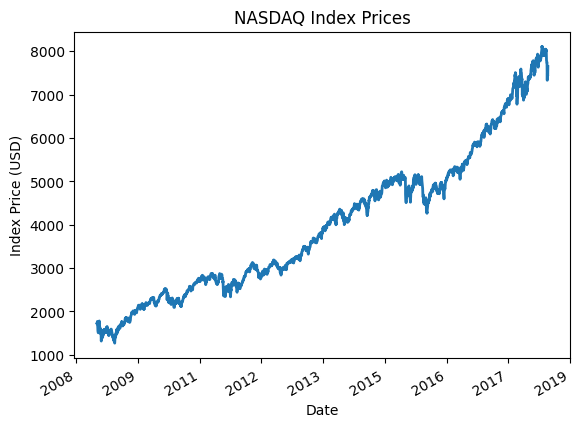

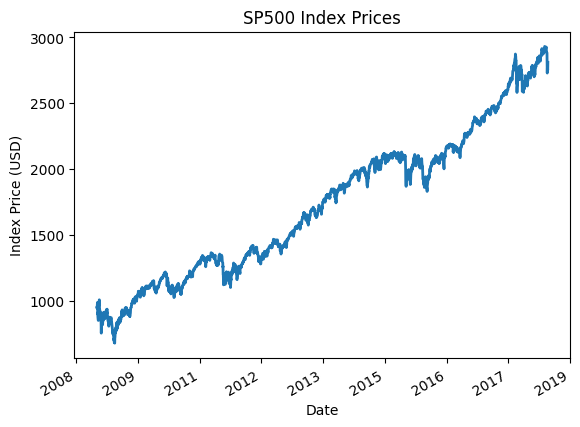

In [9]:
def test_plot_dates_prices():
    """ Test plot_dates_prices"""

    plot_dates_prices(DJIA)
    plot_dates_prices(NASDAQ)
    plot_dates_prices(SP500)
    
test_plot_dates_prices()   

In [10]:
def plot_two_indices(index_file1, index_file2):
    """
    Input: Strings index_file1 and index_file2
    with CSV data for pair of stock indices
    
    Output: matplotlib figure generated by plotting a comparison
    of the price of two indices in the style of 
    https://matplotlib.org/gallery/api/two_scales.html
    """
    cleaned_series1 = clean_series(read_series(index_file1))
    dates1, prices1 = zip(*cleaned_series1)
    days1 = [isodate_to_day(date) for date in dates1]

    cleaned_series2 = clean_series(read_series(index_file2))
    dates2, prices2 = zip(*cleaned_series2)
    days2 = [isodate_to_day(date) for date in dates2]

    fig, axs1 = plt.subplots()

    axs1.plot(days1, prices1, linestyle='solid', color='darkgreen', label=index_file1)
    axs1.set_xlabel('Year')

    axs2 = axs1.twinx()
    axs2.plot(days2, prices2, linestyle='solid', color='navy', label=index_file2)

    index_name1 = index_file1.split('/')[-1].replace('.csv', '')
    index_name2 = index_file2.split('/')[-1].replace('.csv', '')

    axs1.set_ylabel(f'{index_name1} Price (USD)', color='darkgreen')
    axs2.set_ylabel(f'{index_name2} Price (USD)', color='navy')

    axs1.tick_params(axis='y', labelcolor='darkgreen')
    axs2.tick_params(axis='y', labelcolor='navy')

    fig.suptitle(f'{index_name1} vs {index_name2} Index Prices')
    axs1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    fig.autofmt_xdate()

    plt.show()
    return fig


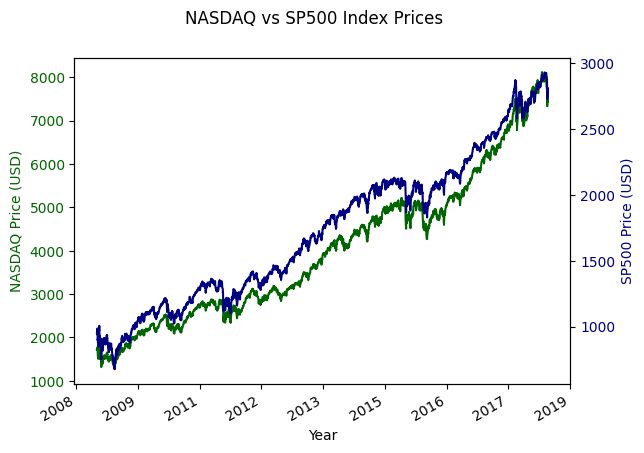

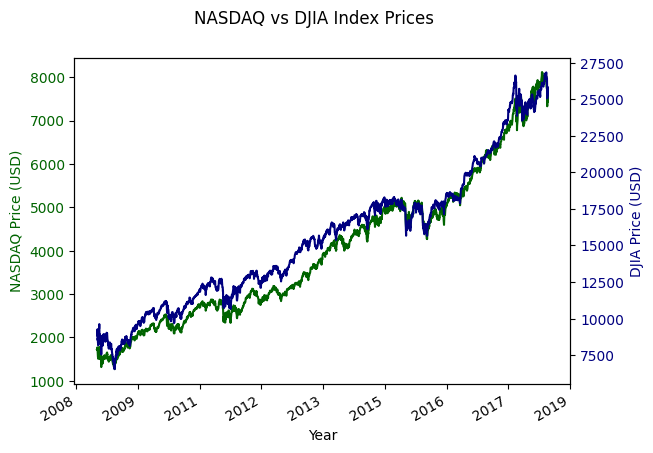

In [ ]:
def test_plot_two_indices():
    """ Test plot_two_indices """
    
    plot_two_indices(NASDAQ, SP500)
    plot_two_indices(NASDAQ, DJIA)

    
test_plot_two_indices()